# Project "Test a Perceptual Phenomenon"
### Use descriptive statistics and a statistical test to analyze the Stroop effect

The input data is available here:
https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view

## Question 1: Identify variables in the experiment

Answer 1: <br>
Independent variable: Is the colour Congruent or Incongruent? <br>
Dependent variable: Average time it takes to name the ink colors in equally-sized lists

### Question 2a: Establish hypotheses
What is an appropriate set of hypotheses for this task? 
### Question 2b: Establish a statistical test
What kind of statistical test do you expect to perform? Justify your choices.

**Answer 2a:** <br>
**Null hypotheses1:** The incongruent color will not increases the time to name the ink color<br>
**Null hypotheses2:** The incongruent color result in the same time to name the ink color<br>
**Alternative hypotheses:** The incongruent color changes the time to name the ink color<br>
<br>
**Answer 2b:** <br>
Statistical Test : dependent t-test (two tailed) <br>
Justification: <br>
+ We do not know pouplation parameters. <br>
+ Pre Test / Post Test study <br>
+ We want to compare two related groups to determine the statistically significant difference between two means.<br>
+ Assumption: Normal distribution <br>
+ Number of samples is less than 30 <br>
+ Two tailed, since hypothesis is testing equality of two means

## Question 3: Report descriptive statistics
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
file = 'stroopdata.csv'
df1 = pd.read_csv(file)
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [8]:
df1.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Question 4: Plot the data
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### Answer 4:
The line plot gives an overview over the time measurment results. It also indicates 2 outliers at the incongruent dataset. <br>
These outliers can also be seen on the hist plot.<br>
The boxplot shows the difference in sampling mean and the IQR for both Congruent and Incongruent samples. <br>
Even though I request the visualization of the outliers (showfliers=True) and the 2 points are clearly above the whisker, they are not plotted. I did not find a solution for this problem.


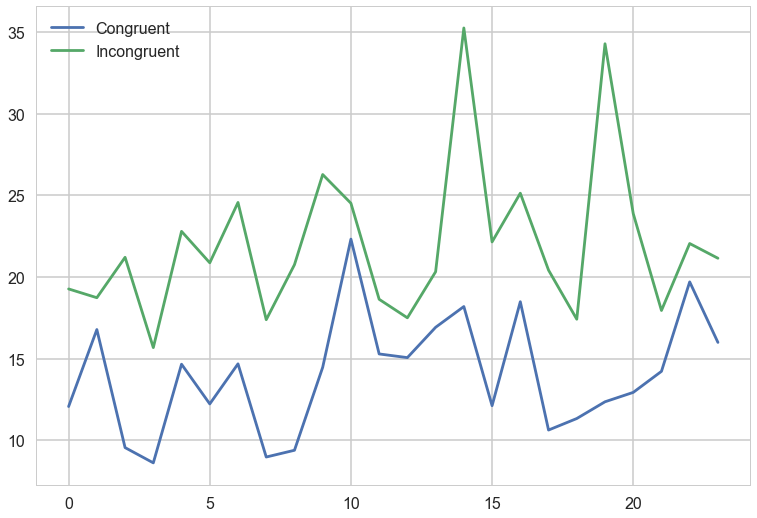

In [22]:
df1.plot()
plt.legend(loc='best')

#### Boxplot:
The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data (default is 1.5*IQR).

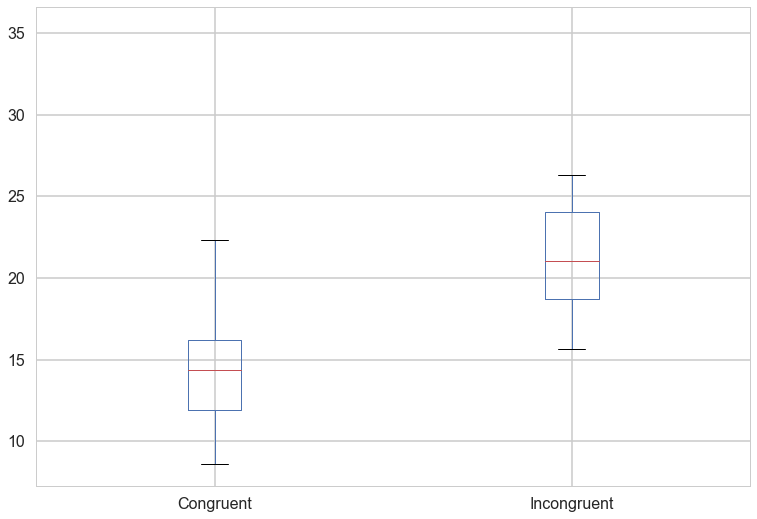

In [38]:
df1.boxplot(showfliers=True)

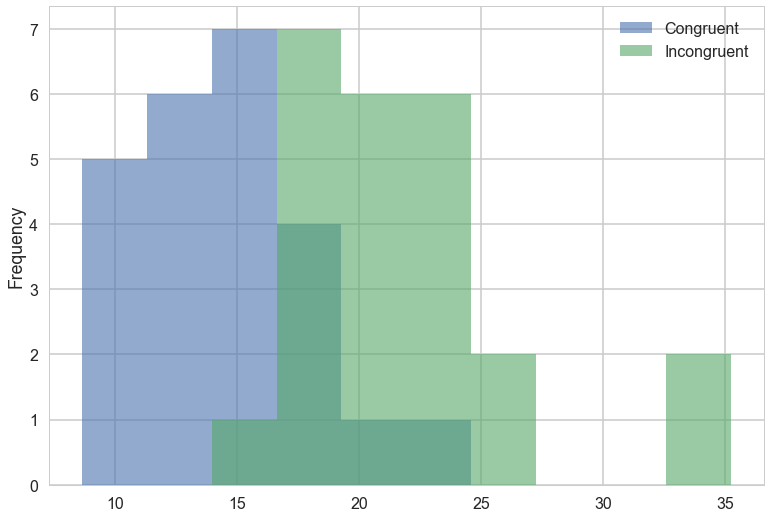

In [19]:
df1.plot(kind='hist', alpha=0.6)

### Question 5: Perform the statistical test and interpret your results
Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations

In [41]:
from scipy import stats
DOF = 23
stats.t.ppf(0.975, DOF)

# Calculate the T-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(df1['Congruent'], df1['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

####  Answer 5:
Since the p-value is clearly below 0.05, we reject the Null Hypthesis. <br>
As a conclusion, we have evidence that the incongruent color changes the average time to name the ink color.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html <br>
Ref: https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples

### Question 6: Digging deeper and extending the investigation
What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!